## 1. Reading the file

*If the requirements aren't installed proceed with installation*

In [ ]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\janku\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
df = pd.read_csv("UltimateClassicRock.csv")

## 2. Extracting basic statistics from the file

In [35]:
numeric_stats = {}
categorical_stats = []

for attr in df.columns:
    missing_values = df[attr].isnull().sum()

    if df[attr].dtype in ['int64', 'float64']:
        stats = df[attr].describe(percentiles=[0.05, 0.95])
        numeric_stats[attr] = stats.to_dict()
        numeric_stats[attr]["missing_values"] = missing_values
        numeric_stats[attr]["unique_values"] = df[attr].nunique()
            
    else:
        value_counts = df[attr].value_counts(normalize=True) * 100
        stats = {
            'attribute': attr,
            'unique_attr_amount': df[attr].nunique(),
            'missing_values': missing_values,
            'class_proportions': value_counts.to_dict()
        }
        categorical_stats.append(stats)

numeric_df = pd.DataFrame(numeric_stats).transpose().reset_index().rename(columns={'index': 'attribute'})
categorical_df = pd.DataFrame(categorical_stats)

display(numeric_df)
display(categorical_df)

numeric_df.to_csv("UltimateClassicRock_numeric.csv", index=False)
categorical_df.to_csv("UltimateClassicRock_categorical.csv", index=False)
    


,attribute,count,mean,std,min,5%,50%,95%,max,missing_values,unique_values
0,Year,14418.0,1987.634693,15.318819,1962.0,1968.000000,1983.000000,2017.00000,2024.000,0.0,63.0
1,Time_Signature,14418.0,3.917811,0.356628,0.0,3.000000,4.000000,4.00000,5.000,0.0,5.0
2,Danceability,14418.0,0.503063,0.142619,0.0,0.262850,0.509000,0.73000,0.987,0.0,788.0
3,Energy,14418.0,0.656563,0.229607,0.0,0.231000,0.690500,0.95600,0.998,0.0,1075.0
4,Key,14418.0,5.166597,3.503423,0.0,0.000000,5.000000,11.00000,11.000,0.0,12.0
5,Loudness,14418.0,-9.438675,4.179623,-60.0,-16.577300,-8.810500,-4.04070,-0.203,0.0,8993.0
6,Mode,14418.0,0.730129,0.443908,0.0,0.000000,1.000000,1.00000,1.000,0.0,2.0
7,Speechiness,14418.0,0.051354,0.046291,0.0,0.026900,0.039000,0.11000,0.952,0.0,994.0
8,Acousticness,14418.0,0.226924,0.268857,0.0,0.000274,0.104000,0.82100,0.995,0.0,3396.0
9,Instrumentalness,14418.0,0.089682,0.215783,0.0,0.000000,0.000737,0.71600,0.992,0.0,4393.0


,attribute,unique_attr_amount,missing_values,class_proportions
0,Track,13328,0,"{'Tumbling Dice - Live': 0.05548619780829519, ..."
1,Artist,94,0,"{'Bob Dylan': 3.148841725620752, 'Elton John':..."
2,Album,1247,0,"{'Fleetwood Mac': 0.24275211541129144, 'Brave ..."
3,Duration,911,0,"{'4:13': 0.7074490220557637, '4:21': 0.6866416..."


## 3. BoxPlot

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

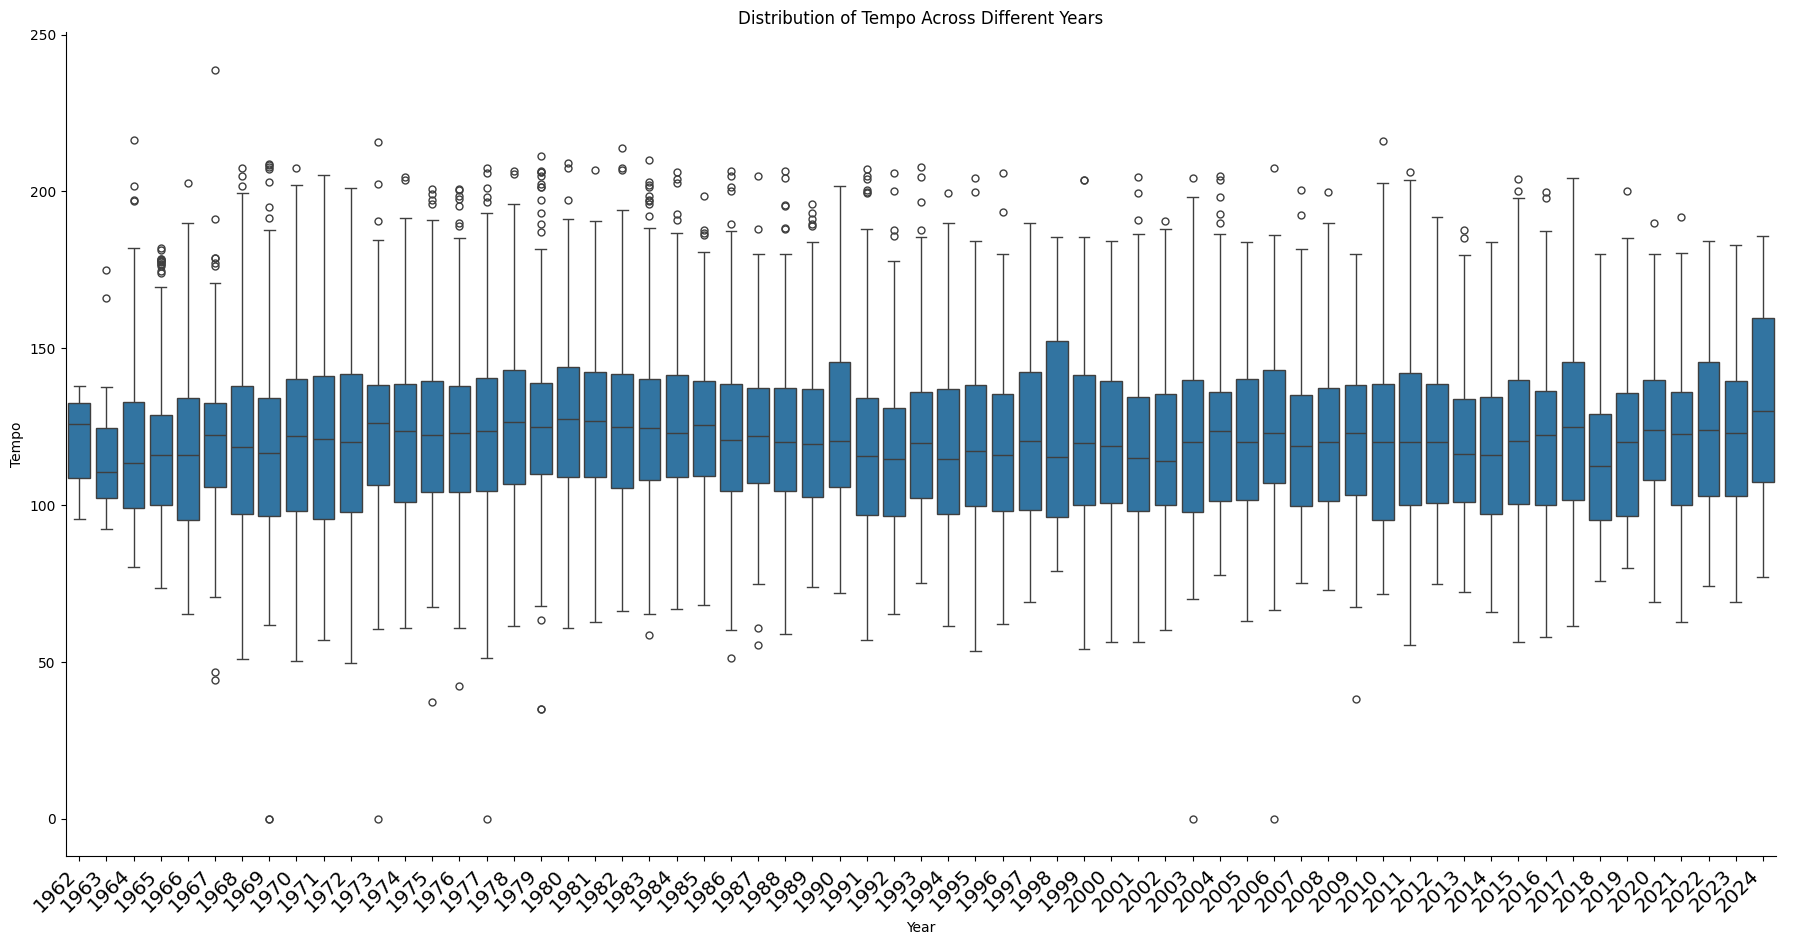

In [41]:
sns.catplot(data=df, x="Year", y="Tempo", kind="box", height=9, aspect=2)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title("Distribution of Tempo Across Different Years")

plt.show()


We can observe that since the 60's the average tempo of the song stays nearly the same, however with the evolution of rock music the standard deviation has gotten larger in the 70's, 80's

## 4. ViolinPlot

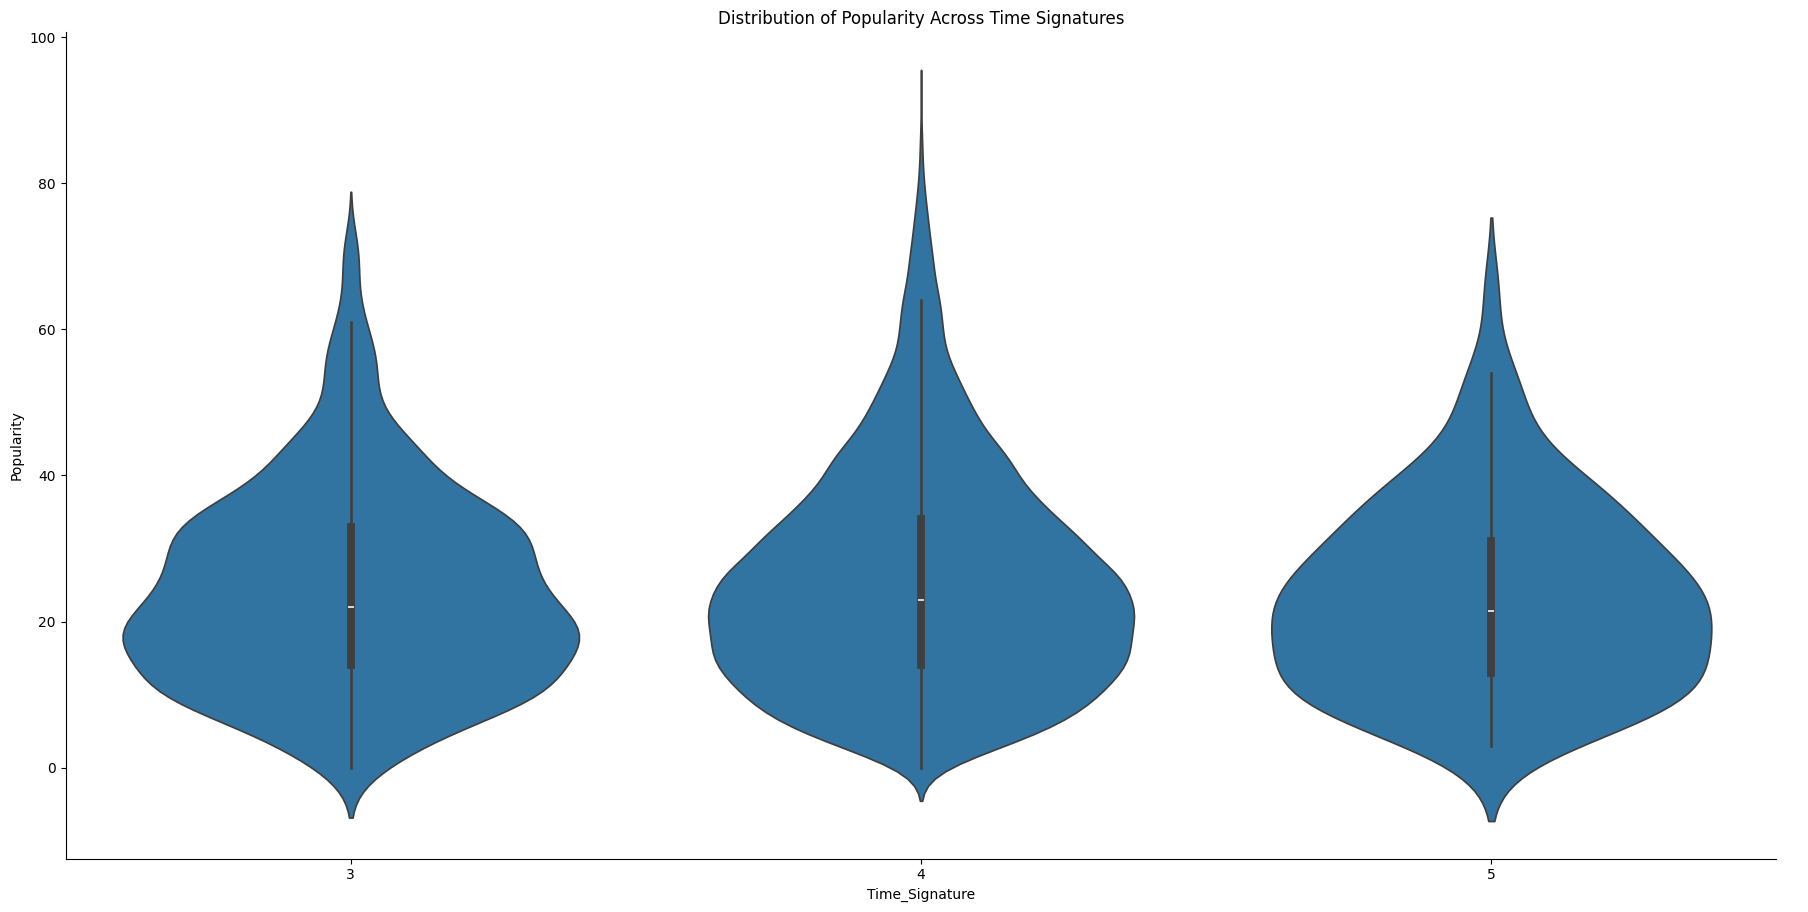

In [62]:



df["Time_Signature"] = pd.to_numeric(df["Time_Signature"]) 
df_filtered = df[df["Time_Signature"].isin([3, 4, 5])]
sns.catplot(data=df_filtered, x="Time_Signature", y="Popularity", kind="violin", height=9, aspect=2)

plt.title("Distribution of Popularity Across Time Signatures")
plt.show()




4/4 is the most popular signature which as most songs are in 4/4.